In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('preprocessed.csv')

# Train Test split

In [3]:
X, y = df.loc[:, df.columns != 'price'], df['price']

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.75, random_state=1)

XTrain, XTest = tf.convert_to_tensor(XTrain, dtype=tf.float64), tf.convert_to_tensor(XTest, dtype=tf.float64)
yTrain, yTest = tf.convert_to_tensor(yTrain, dtype=tf.float64), tf.convert_to_tensor(yTest, dtype=tf.float64)

# Model

In [5]:
class LinearRegression:
    def __init__(self, nFeatures, learningRate=1e-4):
        self.nFeatures = nFeatures
        self.learningRate = learningRate

        self.bias = tf.Variable(np.random.rand(), dtype=tf.float64)
        self.biasBackup = self.bias
        self.weights = tf.Variable(np.random.rand(nFeatures), dtype=tf.float64)
        self.weightsBackup = self.weights

    def predict(self, x):
        return tf.reduce_sum(self.weights*x, 1) + self.bias

    def loss(self, target, predicted):
        return tf.reduce_mean(tf.square(target - predicted))

    def update(self, x, target):
        with tf.GradientTape(persistent=True) as tape:
            loss = self.loss(target, self.predict(x))

        self.biasBackup = self.bias
        dy_db = tape.gradient(loss, self.bias)
        self.bias.assign_sub(dy_db*self.learningRate)

        self.weightsBackup = self.weights
        dy_dw = tape.gradient(loss, self.weights)
        self.weights.assign_sub(dy_dw*self.learningRate)

        return loss.numpy()


    def train(self, x, target, epochs):
        lossHistory = []
        for ithEpoch in range(epochs):
            lossHistory.append(self.update(x, target))

        return lossHistory

# Training

In [6]:
model = LinearRegression(XTrain.shape[-1])

In [7]:
lossHistory = model.train(XTrain, yTrain, 200)

# Plotting loss history

Text(0.5, 1.0, 'last loss: 13337915.396355808')

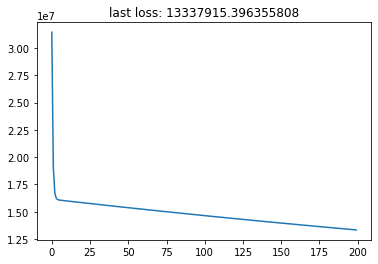

In [13]:
plt.plot(range(len(lossHistory)), lossHistory)
plt.title(f'last loss: {lossHistory[-1]}')